In [1]:
import pandas as pd
import seaborn as sb
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,10)

In [2]:
# ========================================================== Load and clean data =============================================================

In [3]:
# Load data
df = pd.read_csv('Data/movies.csv')

In [4]:
# show how many % does na index takes
for col in df.columns:
    missing_pc = np.mean(df[col].isnull())
    print('{} - {}'.format(col, missing_pc))

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [5]:
# Replace and drop Na index row
df['rating'] = df['rating'].fillna(0)
df['score'] = df['score'].fillna(0)
df['votes'] = df['votes'].fillna(0)
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

df.dropna(inplace=True)

In [6]:
# Change type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [7]:
# create new column
df['month'] = df['released'].astype(str).str.split(' ',n=1, expand=True)[0]
df.drop('released', axis=1, inplace=True)

In [8]:
df.sort_values(by=['gross', 'budget'], inplace =False, ascending=False)
# pd.set_option('display.max_rows', None)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,December
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,April
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,December
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,December
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,Open,0,Drama,2019,7.9,73,Andoy Ranay,Wanggo Gallaga,JC Santos,Philippines,0,0,ABS-CBN Film Productions,105,October
7641,By Light of Desert Night,0,Drama,2019,4.8,373,David Stuart Snell,David Stuart Snell,Alexandra Bokova,United States,0,0,Canyon Media,94,March
7660,Aloha Surf Hotel,0,Comedy,2020,7.1,14,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,0,0,Abominable Pictures,90,November
7664,Dream Round,0,Comedy,2020,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,February


In [9]:
# ====================================================== Finding correlation in thedata ======================================================
plt.style.use('seaborn-v0_8')

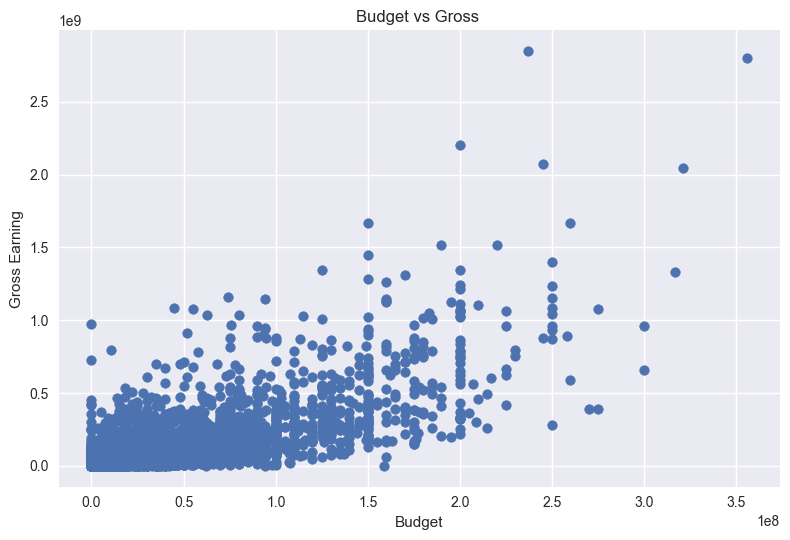

In [10]:
# budget and gross correlation
budget = df['budget']
gross = df['gross']

plt.scatter(budget, gross)

plt.title("Budget vs Gross ")
plt.xlabel("Budget")
plt.ylabel("Gross Earning")

plt.tight_layout()
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

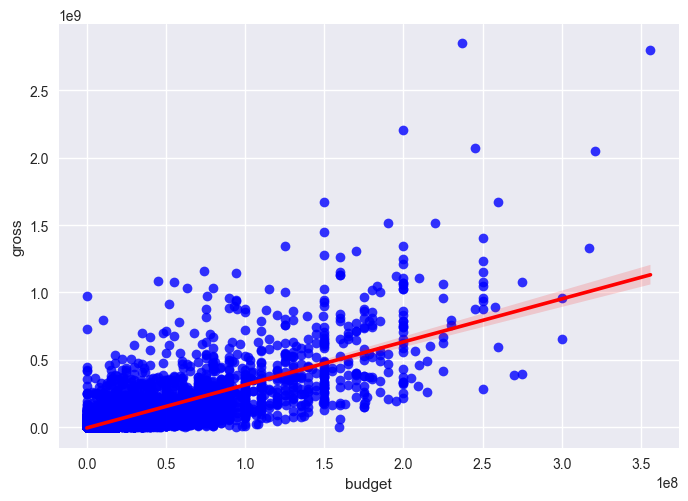

In [11]:
# budget and gross correlation using seaborn
sb.regplot(x='budget', y='gross', data=df, scatter_kws={"color" : "blue"}, line_kws={"color" : "red"})

In [12]:
# correlation between numeric columns
numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr(method='spearman')

print(corr_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.098404  0.470700  0.292635  0.316406  0.142194
score    0.098404  1.000000  0.428431 -0.008792  0.131321  0.399322
votes    0.470700  0.428431  1.000000  0.604004  0.752873  0.288243
budget   0.292635 -0.008792  0.604004  1.000000  0.716974  0.246123
gross    0.316406  0.131321  0.752873  0.716974  1.000000  0.254859
runtime  0.142194  0.399322  0.288243  0.246123  0.254859  1.000000


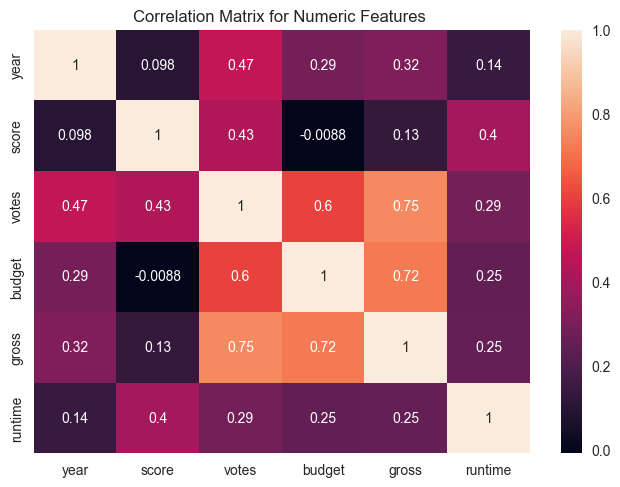

In [13]:
sb.heatmap(corr_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features ")

plt.show()

In [14]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,6567,7,6,1980,8.4,927000,2578,4000,1041,54,19000000,46998772,2313,146,14
1,5556,7,1,1980,5.8,65000,2261,1629,325,55,4500000,58853106,727,104,13
2,5127,5,0,1980,8.7,1200000,1109,2559,1737,55,18000000,538375067,1534,124,14
3,285,5,4,1980,7.7,221000,1297,1995,2237,55,3500000,83453539,1806,88,13
4,1026,7,4,1980,7.3,108000,1052,518,408,55,6000000,39846344,1771,98,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7659,2648,4,9,2020,3.4,447,1606,2458,1526,55,0,13266,1986,87,15
7660,337,0,4,2020,7.1,14,2580,3977,194,55,0,0,83,90,17
7661,3347,7,6,2020,0.0,0,1542,577,1988,55,1000000,0,880,121,17
7664,1676,0,4,2020,4.7,36,773,2606,1878,55,0,0,535,90,11


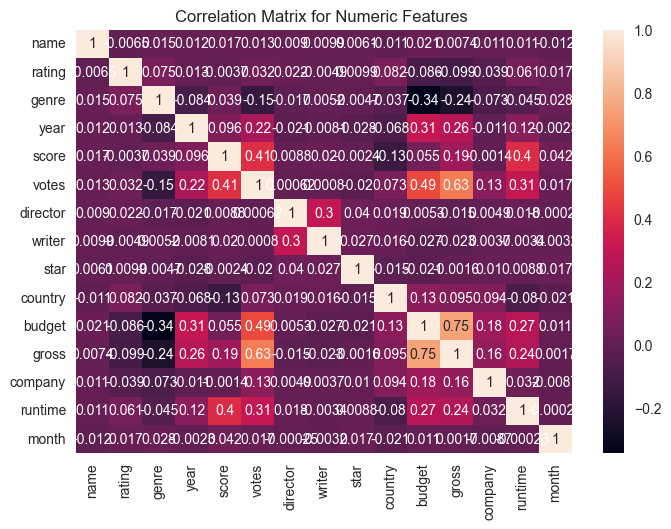

In [15]:
correlation_matrix = df_numerized.corr(method='pearson')

sb.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features ")

plt.show()


In [16]:
correlation_map = df_numerized.corr()

corr_pairs = correlation_map.unstack()

corr_pairs

name   name       1.000000
       rating    -0.006501
       genre      0.015208
       year       0.011883
       score      0.016715
                    ...   
month  budget     0.011161
       gross      0.001693
       company   -0.008693
       runtime   -0.000231
       month      1.000000
Length: 225, dtype: float64